**Importing the libraries**

In [103]:
import numpy as np
import pandas as pd
df=pd.read_csv("careerds.csv")
df.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,4,0,4,8,yes,yes,yes,shell programming,cloud computing,no,yes,excellent,excellent,cloud computing,system developer,higherstudies,Web Services,no,no,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,7,1,2,3,yes,no,yes,machine learning,database security,no,no,poor,medium,networks,Business process analyst,job,SAaS services,yes,yes,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,1,4,1,3,yes,no,yes,app development,web technologies,no,yes,poor,excellent,hacking,developer,higherstudies,Sales and Marketing,yes,yes,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,1,1,2,5,no,yes,no,python,data science,yes,no,medium,excellent,networks,testing,higherstudies,Testing and Maintainance Services,no,no,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,5,4,6,3,no,no,no,app development,cloud computing,no,no,poor,excellent,Computer Architecture,testing,higherstudies,product development,no,yes,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst


In [104]:
# Data
data = df.iloc[:,:-1].values
label = df.iloc[:,-1]

In [105]:
# performing Label Encoding for Converting into Numeric values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()

for i in range(14,38):
    data[:,i] = labelencoder.fit_transform(data[:,i])

#Normalizing the data
from sklearn.preprocessing import Normalizer
data1=data[:,:14]
nor_data = Normalizer().fit_transform(data1)

data2=data[:,14:]
df1 = np.append(nor_data,data2,axis=1)


In [106]:
#Combining into a dataset
df2=df.iloc[:,:-1]
ds = pd.DataFrame(df1,columns=df2.columns)
ds

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert
0,0.28509,0.260299,0.322276,0.359461,0.388383,0.388383,0.359461,0.347066,0.252036,0.0371856,0.016527,0,0.016527,0.0330539,1,1,1,8,0,0,1,0,0,4,4,0,8,0,0,21,1,0,1,0,0,0,1,0
1,0.34998,0.278189,0.327545,0.269215,0.318571,0.314085,0.327545,0.376901,0.40831,0.0538431,0.0314085,0.00448692,0.00897384,0.0134608,1,0,1,5,2,0,0,2,1,7,0,1,4,1,1,5,1,1,0,1,0,0,0,1
2,0.295012,0.357339,0.378115,0.361494,0.253461,0.336563,0.299168,0.299168,0.39058,0.0457062,0.0041551,0.0166204,0.0041551,0.0124653,1,0,1,0,7,0,1,2,0,6,2,0,5,1,1,29,0,0,1,0,1,0,0,1
3,0.328025,0.375503,0.258967,0.362554,0.384135,0.315077,0.2676,0.379819,0.297812,0.0302129,0.00431612,0.00431612,0.00863224,0.0215806,0,1,0,6,1,1,0,1,0,7,5,0,7,0,0,23,0,1,0,0,1,1,1,1
4,0.397157,0.267649,0.388523,0.289234,0.306502,0.384206,0.315136,0.306502,0.315136,0.0172677,0.0215846,0.0172677,0.0259016,0.0129508,0,0,0,0,0,0,0,2,0,0,5,0,9,0,1,7,1,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.366575,0.29591,0.273827,0.278244,0.357742,0.326826,0.397491,0.370992,0.304743,0.0176663,0.00883314,0.0264994,0.00441657,0.0353326,1,0,0,0,0,1,0,2,0,3,4,1,7,0,1,17,0,1,1,0,0,1,1,0
19996,0.34342,0.2962,0.356299,0.37347,0.352006,0.283322,0.283322,0.394933,0.287615,0.0300493,0.034342,0,0.0386348,0.034342,1,0,0,2,3,0,1,1,0,2,0,0,3,1,1,7,1,0,1,0,0,0,0,1
19997,0.343084,0.289348,0.330683,0.359618,0.264546,0.351351,0.285214,0.388553,0.363751,0.0289348,0.0124006,0.0248012,0.00826707,0.0124006,1,1,1,4,2,1,1,1,0,7,1,0,4,1,1,10,0,1,0,1,1,0,0,1
19998,0.294792,0.377161,0.394502,0.381496,0.286122,0.320804,0.264446,0.377161,0.264446,0.0216759,0.00433518,0.0173407,0.0390166,0.0216759,0,0,0,2,0,0,1,2,2,1,5,1,1,1,0,29,0,0,0,0,1,1,1,0


In [130]:
# labeling the data
label = df.iloc[:,-1]
original=label.unique() 
label=label.values
label2 = labelencoder.fit_transform(label)
y=pd.DataFrame(label2,columns=["Suggested Job Role"])
numeric=y["Suggested Job Role"].unique() 
Y= pd.DataFrame({'Suggested Job Role':original, 'Associated Number':numeric})

In [132]:
Y

,Suggested Job Role,Associated Number
0,Database Developer,7
1,Portal Administrator,18
2,Systems Security Administrator,28
3,Business Systems Analyst,2
4,Software Systems Engineer,25
5,Business Intelligence Analyst,1
6,CRM Technical Developer,4
7,Mobile Applications Developer,14
8,UX Designer,32
9,Quality Assurance Associate,21


**Decision Tree**

Dependent Variable: Categorical

Independent Variable : Categorical and Continous

Used to classify records in a pictorial format with the help of gini index

Random Forest Technique is used to find the accuracy and important features to be used while implementing Decision Tree.

In [133]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=1000,max_features=2,oob_score=True)
X = ds.copy()
rf_model.fit(D,df['Suggested Job Role'])
print("OOB Accuracy")
print(rf_model.oob_score_)

OOB Accuracy
0.0424


In [71]:
feature = X.columns
imp=np.empty(len(feature))
i=0
for feat,imp_val in zip(feature,rf_model.feature_importances_):
    imp[i]=imp_val
    i=i+1

indices = np.argsort(imp)

for i in indices:
    print(feature[i],imp[i])

hard/smart worker 0.012738105216271224
Management or Technical 0.012797571618434651
Taken inputs from seniors or elders 0.012822252538608282
In a Realtionship? 0.012876940859444984
self-learning capability? 0.012978828962894418
worked in teams ever? 0.012999701628607448
Salary Range Expected 0.013004879396367299
interested in games 0.013097858789789552
Introvert 0.013205412251674183
Salary/work 0.013227707545329816
Gentle or Tuff behaviour? 0.01323453990915339
talenttests taken? 0.013332594848514725
Extra-courses did 0.013387769779143468
Job/Higher Studies? 0.01343321419641518
can work long time before system? 0.013515405999420672
olympiads 0.013542248236230986
reading and writing skills 0.01961874266067494
memory capability score 0.019936889342538854
interested career area  0.027964777715892793
workshops 0.03026103453010664
certifications 0.031199787287637327
Type of company want to settle in? 0.03158970099394657
Interested subjects 0.03181845967080396
Interested Type of Books 0.03684

In [72]:
#Decision Tree Classifier

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score

In [134]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [135]:
dtree_model = tree.DecisionTreeClassifier()
dtree_model = dtree_model.fit(X_train, y_train)
dtree_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [136]:
#Generating Decision Tree Graph
features=['Acedamic percentage in Operating Systems', 'percentage in Algorithms',
       'Percentage in Programming Concepts',
       'Percentage in Software Engineering', 'Percentage in Computer Networks',
       'Percentage in Electronics Subjects',
       'Percentage in Computer Architecture', 'Percentage in Mathematics',
       'Percentage in Communication skills', 'Hours working per day',
       'Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'can work long time before system?',
       'self-learning capability?', 'Extra-courses did', 'certifications',
       'workshops', 'talenttests taken?', 'olympiads',
       'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ', 'Job/Higher Studies?',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'interested in games',
       'Interested Type of Books', 'Salary Range Expected',
       'In a Realtionship?', 'Gentle or Tuff behaviour?',
       'Management or Technical', 'Salary/work', 'hard/smart worker',
       'worked in teams ever?', 'Introvert']
with open('Dtree3.dot','w') as f:
    f=tree.export_graphviz(DT_model,feature_names=features,out_file=f)

In [137]:
t=tree.export_text(DT_model,feature_names=features)
print(t)

|--- Percentage in Electronics Subjects <= 0.44
|   |--- percentage in Algorithms <= 0.44
|   |   |--- percentage in Algorithms <= 0.44
|   |   |   |--- Acedamic percentage in Operating Systems <= 0.44
|   |   |   |   |--- coding skills rating <= 0.04
|   |   |   |   |   |--- percentage in Algorithms <= 0.39
|   |   |   |   |   |   |--- public speaking points <= 0.04
|   |   |   |   |   |   |   |--- Percentage in Electronics Subjects <= 0.31
|   |   |   |   |   |   |   |   |--- Logical quotient rating <= 0.00
|   |   |   |   |   |   |   |   |   |--- Acedamic percentage in Operating Systems <= 0.37
|   |   |   |   |   |   |   |   |   |   |--- public speaking points <= 0.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- public speaking points >  0.04
|   |   |   |   |   |   |   |   |   |   |   |--- class: 14
|   |   |   |   |   |   |   |   |   |--- Acedamic percentage in Operating Systems >  0.37
|   |   |   |   

In [138]:
# Performing prediction on data
y_pred = dtree_model.predict(X_test)
y_test_arr=y_test['Suggested Job Role']
Final = pd.DataFrame({'Predicted':y_pred, 'Actual':y_test_arr})
Final.reset_index()

,index,Predicted,Actual
0,19778,17,24
1,4376,20,24
2,10188,15,10
3,9887,18,5
4,4441,5,9
...,...,...,...
3995,13123,27,20
3996,18706,22,17
3997,7274,14,25
3998,16155,26,0


In [139]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print("accuracy=",accuracy*100)

accuracy= 3.25


In [140]:
# Number of correctly predicted data
comp_column = np.where(Final['Predicted'] == Final['Actual'], 1, 0)
Number_of_correct_predictions=list(comp_column).count(1)
print("Number_of_correct_predictions : ",((Number_of_correct_predictions)/4000)*100,"%")
accuracy_dtree=Number_of_correct_predictions

Number_of_correct_predictions :  3.25 %


In [141]:
y_train=y_train['Suggested Job Role']
y_train

18660    16
10831     4
5511     28
3543     11
12340     3
         ..
9372     31
7291     19
17728     5
7293      6
17673    31
Name: Suggested Job Role, Length: 16000, dtype: int64

 **Support Vector Machine** **(SVM)**


In [142]:
# Run svm with default hyper parameters
# default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters
# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instantiates classifier with default hyperparameters
svc=SVC() 

# fits classifier to training set
svc.fit(X_train,y_train)

# makes predictions on test set
y_pred=svc.predict(X_test)


# computing and printing accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score with default hyperparameters: 3.2500


In [143]:
# Run svm with default hyper parameters
# Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters
# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instantiate classifier with default hyperparameters
svc=SVC() 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score with default hyperparameters: 5.6000


**XG BOOST**

In [167]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

X_train=pd.to_numeric(X_train.values.flatten())
X_train=X_train.reshape((16000,38))
X_test=pd.to_numeric(X_test.values.flatten())
X_test=X_test.reshape((4000,38))

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train['Suggested Job Role'])


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [145]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.0425


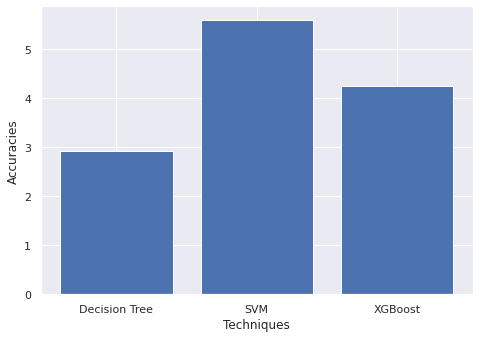

In [146]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Name = ['Decision Tree', 'SVM', 'XGBoost']
accuracies = [2.925,5.6,4.25]
ax.bar(Name,accuracies)
ax.set_ylabel('Accuracies')
ax.set_xlabel('Techniques')
plt.show()

So, SVM has highest Accuuracy and hence is best suited.

**Evaluating the Model**

In [162]:
import numpy as np
import pandas as pd
df = pd.read_csv("/content/careerds.csv")
# Dataset is now stored in a Pandas Dataframe

In [163]:
#Data Preprocessing
#1. Handling Missing values:
df1.isna()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [164]:
df1.duplicated()
df1.drop_duplicates()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,4,0,4,8,1,1,1,8,0,0,1,0,0,4,4,0,8,0,0,21,1,0,1,0,0,0,1,0,7
1,78,62,73,60,71,70,73,84,91,12,7,1,2,3,1,0,1,5,2,0,0,2,1,7,0,1,4,1,1,5,1,1,0,1,0,0,0,1,18
2,71,86,91,87,61,81,72,72,94,11,1,4,1,3,1,0,1,0,7,0,1,2,0,6,2,0,5,1,1,29,0,0,1,0,1,0,0,1,18
3,76,87,60,84,89,73,62,88,69,7,1,1,2,5,0,1,0,6,1,1,0,1,0,7,5,0,7,0,0,23,0,1,0,0,1,1,1,1,28
4,92,62,90,67,71,89,73,71,73,4,5,4,6,3,0,0,0,0,0,0,0,2,0,0,5,0,9,0,1,7,1,0,1,0,1,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69,4,2,6,1,8,1,0,0,0,0,1,0,2,0,3,4,1,7,0,1,17,0,1,1,0,0,1,1,0,29
19996,80,69,83,87,82,66,66,92,67,7,8,0,9,8,1,0,0,2,3,0,1,1,0,2,0,0,3,1,1,7,1,0,1,0,0,0,0,1,10
19997,83,70,80,87,64,85,69,94,88,7,3,6,2,3,1,1,1,4,2,1,1,1,0,7,1,0,4,1,1,10,0,1,0,1,1,0,0,1,1
19998,68,87,91,88,66,74,61,87,61,5,1,4,9,5,0,0,0,2,0,0,1,2,2,1,5,1,1,1,0,29,0,0,0,0,1,1,1,0,24


In [168]:
df1=df1.dropna()
df1.isna().sum().sum()

0

In [169]:
df1.dtypes


Acedamic percentage in Operating Systems    int64
percentage in Algorithms                    int64
Percentage in Programming Concepts          int64
Percentage in Software Engineering          int64
Percentage in Computer Networks             int64
Percentage in Electronics Subjects          int64
Percentage in Computer Architecture         int64
Percentage in Mathematics                   int64
Percentage in Communication skills          int64
Hours working per day                       int64
Logical quotient rating                     int64
hackathons                                  int64
coding skills rating                        int64
public speaking points                      int64
can work long time before system?            int8
self-learning capability?                    int8
Extra-courses did                            int8
certifications                               int8
workshops                                    int8
talenttests taken?                           int8


In [170]:
df1['can work long time before system?']

0        1
1        1
2        1
3        0
4        0
        ..
19995    1
19996    1
19997    1
19998    0
19999    1
Name: can work long time before system?, Length: 20000, dtype: int8

In [171]:
df1['can work long time before system?']=df1['can work long time before system?'].astype('category')
df1['can work long time before system?']=df1['can work long time before system?'].cat.codes
df1['can work long time before system?']

0        1
1        1
2        1
3        0
4        0
        ..
19995    1
19996    1
19997    1
19998    0
19999    1
Name: can work long time before system?, Length: 20000, dtype: int8

In [172]:
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = df1[col].astype('category')
    df1[col] = df1[col].cat.codes
df1.dtypes

Acedamic percentage in Operating Systems    int64
percentage in Algorithms                    int64
Percentage in Programming Concepts          int64
Percentage in Software Engineering          int64
Percentage in Computer Networks             int64
Percentage in Electronics Subjects          int64
Percentage in Computer Architecture         int64
Percentage in Mathematics                   int64
Percentage in Communication skills          int64
Hours working per day                       int64
Logical quotient rating                     int64
hackathons                                  int64
coding skills rating                        int64
public speaking points                      int64
can work long time before system?            int8
self-learning capability?                    int8
Extra-courses did                            int8
certifications                               int8
workshops                                    int8
talenttests taken?                           int8


In [173]:
df1.describe()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,77.002300,76.948200,77.017550,77.094500,76.958200,77.015550,77.069850,76.913100,76.921450,7.985950,4.995050,2.992650,5.004750,5.012800,0.501000,0.505100,0.497550,4.033400,3.519450,0.502350,0.503950,0.999350,1.000450,4.506800,2.505150,0.49645,4.486550,0.501800,0.499300,15.213850,0.502000,0.502800,0.49845,0.502350,0.496100,0.502350,0.497300,0.504850,16.502750
std,10.085697,10.101733,10.134815,10.087837,10.020088,10.168888,10.069059,10.138555,10.103494,2.593798,2.578383,2.005791,2.576831,2.588875,0.500012,0.499986,0.500006,2.576318,2.288642,0.500007,0.499997,0.817914,0.816874,2.873616,1.709333,0.50000,2.879589,0.500009,0.500012,8.661713,0.500009,0.500005,0.50001,0.500007,0.499997,0.500007,0.500005,0.499989,9.639131
min,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,4.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,6.000000,3.000000,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.00000,2.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,8.000000,5.000000,3.000000,5.000000,5.000000,1.000000,1.000000,0.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,5.000000,3.000000,0.00000,4.000000,1.000000,0.000000,15.000000,1.000000,1.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,16.000000
75%,86.000000,86.000000,86.000000,86.000000,85.000000,86.000000,86.000000,86.000000,86.000000,10.000000,7.000000,5.000000,7.000000,7.000000,1.000000,1.000000,1.000000,6.000000,6.000000,1.000000,1.000000,2.000000,2.000000,7.000000,4.000000,1.00000,7.000000,1.000000,1.000000,23.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000
max,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,12.000000,9.000000,6.000000,9.000000,9.000000,1.000000,1.000000,1.000000,8.000000,7.000000,1.000000,1.000000,2.000000,2.000000,9.000000,5.000000,1.00000,9.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000


In [174]:
left = df1.groupby('Suggested Job Role')
left.mean()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert
Suggested Job Role,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,76.524501,77.061706,76.934664,76.196007,76.401089,77.658802,76.386570,77.201452,76.938294,8.107078,4.778584,2.882033,4.947368,4.907441,0.497278,0.493648,0.491833,4.192377,3.442831,0.544465,0.511797,0.952813,1.023593,4.553539,2.450091,0.471869,4.511797,0.470054,0.486388,15.343013,0.499093,0.504537,0.499093,0.533575,0.482759,0.502722,0.497278,0.488203
1,76.742593,78.055556,76.646296,77.287037,76.596296,76.761111,76.690741,76.633333,76.527778,8.120370,4.814815,3.000000,5.020370,5.064815,0.516667,0.511111,0.494444,4.022222,3.564815,0.496296,0.516667,0.987037,1.014815,4.462963,2.444444,0.487037,4.518519,0.498148,0.453704,15.533333,0.548148,0.477778,0.492593,0.498148,0.481481,0.450000,0.466667,0.490741
2,76.963918,77.154639,77.092784,77.185567,76.786942,76.910653,77.176976,76.728522,76.793814,7.828179,4.981100,3.008591,5.054983,5.001718,0.512027,0.522337,0.515464,4.219931,3.467354,0.527491,0.489691,0.989691,0.991409,4.606529,2.551546,0.512027,4.367698,0.498282,0.501718,15.427835,0.481100,0.505155,0.486254,0.467354,0.500000,0.500000,0.500000,0.539519
3,76.818493,76.957192,77.073630,76.113014,77.071918,76.662671,76.875000,77.166096,76.433219,7.964041,5.198630,3.054795,5.006849,5.191781,0.488014,0.546233,0.541096,3.892123,3.467466,0.491438,0.493151,0.924658,0.976027,4.417808,2.440068,0.491438,4.532534,0.503425,0.527397,14.578767,0.453767,0.518836,0.520548,0.505137,0.481164,0.474315,0.453767,0.494863
4,76.798942,76.733686,78.291005,76.892416,76.631393,76.894180,77.029982,76.544974,76.507937,8.141093,5.178131,3.093474,5.116402,4.911817,0.486772,0.516755,0.507937,4.097002,3.455026,0.481481,0.481481,1.008818,0.984127,4.483245,2.470899,0.506173,4.492063,0.516755,0.488536,14.758377,0.502646,0.488536,0.513228,0.507937,0.495591,0.506173,0.553792,0.500882
5,76.829787,76.900709,77.962766,78.088652,76.836879,77.177305,77.629433,76.684397,76.930851,7.792553,4.936170,2.998227,5.253546,4.946809,0.485816,0.507092,0.507092,4.111702,3.457447,0.517730,0.500000,1.026596,1.026596,4.597518,2.388298,0.512411,4.608156,0.503546,0.530142,14.631206,0.478723,0.517730,0.514184,0.549645,0.473404,0.510638,0.494681,0.517730
6,77.084317,76.500843,77.215852,77.780776,76.362563,76.959528,77.193929,76.524452,76.812816,7.892074,4.902192,3.013491,4.956155,5.008432,0.502530,0.495784,0.492411,3.996627,3.367622,0.505902,0.485666,0.920742,0.996627,4.564924,2.475548,0.524452,4.430017,0.514334,0.495784,14.932546,0.499157,0.507589,0.478921,0.460371,0.500843,0.543002,0.487352,0.475548
7,76.879518,76.913941,77.013769,77.177281,77.654045,77.223752,77.335628,76.987952,76.500861,8.137694,5.072289,3.056799,4.941480,4.969019,0.516351,0.516351,0.481928,4.182444,3.426850,0.481928,0.509466,0.981067,1.043029,4.492255,2.466437,0.512909,4.571429,0.487091,0.481928,15.371773,0.492255,0.506024,0.475043,0.464716,0.499139,0.500861,0.485370,0.480207
8,76.942105,77.289474,77.215789,76.905263,76.659649,76.964912,76.668421,76.977193,76.850877,7.878947,4.903509,2.870175,5.024561,4.922807,0.519298,0.482456,0.498246,4.015789,3.457895,0.540351,0.4

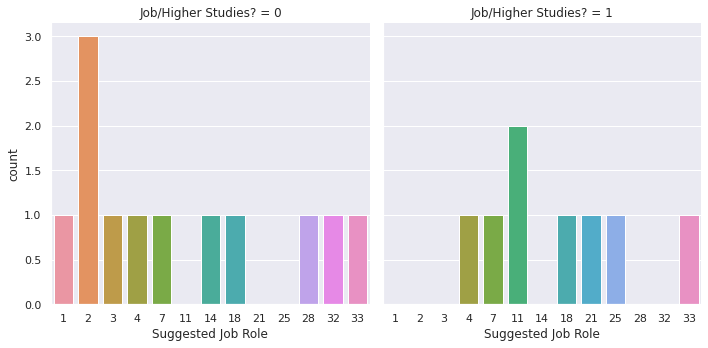

In [179]:
import seaborn as sns
sns.set(style="darkgrid")
g = sns.catplot(x="Suggested Job Role",col="Job/Higher Studies?",data=df1.head(20), kind="count");

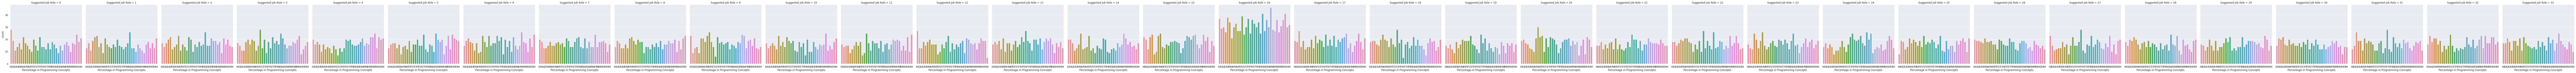

In [160]:
g = sns.catplot(x="Percentage in Programming Concepts", col="Suggested Job Role",data=df1, kind="count");

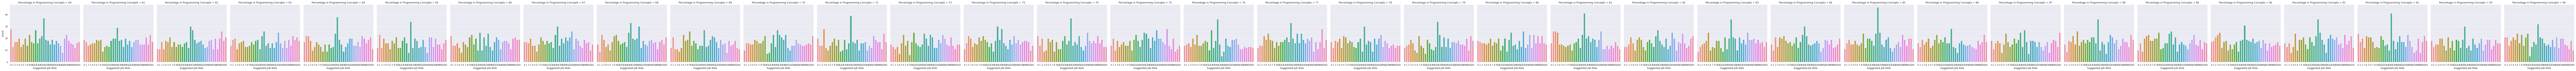

In [180]:
g = sns.catplot(x="Suggested Job Role",col="Percentage in Programming Concepts", data=df1, kind="count");